In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [4]:
# Load the cleaned data into a data frame
file_path = Path('./cleaned_data/data_by_country.csv')
df = pd.read_csv(file_path)
#df = pd.read_csv(file_path, index_col=0)
df.head(20)            

,Unnamed: 0,Country,Literacy_Rate,Buddhists,Christians,Folk_Religions,Hindus,Jews,Muslims,Other_Religions,...,gpd_2010,gpd_2015,gdp_per_capita_2000,gdp_per_capita_2005,gdp_per_capita_2010,gdp_per_capita_2015,mortality_rate_2000,mortality_rate_2005,mortality_rate_2010,mortality_rate_2015
0,0,Albania,96.8,1.0,18.0,1.0,1.0,1.0,80.3,1.0,...,1.192692e+10,1.138685e+10,1126.683340,2673.786584,4094.348386,3952.802538,106.10,105.70,103.50,92.24
1,1,Algeria,72.6,1.0,1.0,1.0,1.0,1.0,97.9,1.0,...,1.612073e+11,1.659793e+11,1765.027146,3113.094883,4480.786318,4177.889542,141.90,119.30,104.40,96.49
2,2,Angola,70.4,1.0,90.5,4.2,1.0,1.0,1.0,1.0,...,8.169956e+10,8.721929e+10,556.836182,1902.422150,3497.974488,3127.890598,383.60,322.70,269.70,239.80
3,3,Antigua and Barbuda,99.0,1.0,93.0,3.6,1.0,1.0,1.0,1.0,...,1.148700e+09,1.336693e+09,10872.292952,12557.547850,13048.960582,14285.329777,156.70,156.10,134.60,121.90
4,4,Argentina,97.9,1.0,85.2,1.0,1.0,1.0,1.0,1.0,...,4.236274e+11,5.947493e+11,7708.099115,5109.852245,10385.964432,13789.060425,138.50,124.90,118.70,112.70
5,5,Armenia,99.6,1.0,98.5,1.0,1.0,1.0,1.0,1.0,...,9.260285e+09,1.055334e+10,622.740923,1643.756889,3218.378299,3607.289299,143.40,139.70,137.90,121.30
6,6,Australia,99.0,2.7,67.3,1.0,1.4,1.0,2.4,1.0,...,1.147589e+12,1.350534e+12,21697.708480,34080.999895,52087.972289,56707.022077,76.93,68.13,63.06,62.17
7,7,Austria,98.0,1.0,80.4,1.0,1.0,1.0,5.4,1.0,...,3.922751e+11,3.819711e+11,24625.600723,38417.457786,46903.761585,44195.817595,93.72,83.70,74.43,64.34
8,8,Azerbaijan,99.8,1.0,3.0,1.0,1.0,1.0,96.9,1.0,...,5.290929e+10,5.307437e+10,655.119945,1578.402390,5843.533768,5500.310382,161.00,160.00,131.80,119.50
9,9,Bahrain,94.6,2.5,14.5,1.0,9.8,1.0,70.3,1.0,...,2.571327e+10,3.105064e+10,13636.416750,17959.396827,20722.070490,22634.085648,100.80,83.48,65.97,58.52


In [5]:
high = 20
med = 10
# Turn mortality_rate_2015 into a %
df['mortality_rate'] = df['mortality_rate_2015'].div(1000).mul(100)

# Syntax to add column based on another column range found at
#https://stackoverflow.com/questions/59642338/creating-new-column-based-on-condition-on-other-column-in-pandas-dataframe
df['mortality_state']=np.select([df['mortality_rate']<med,df['mortality_rate'].between(med,high)],[1,2],3)
df.head(10)


,Unnamed: 0,Country,Literacy_Rate,Buddhists,Christians,Folk_Religions,Hindus,Jews,Muslims,Other_Religions,...,gdp_per_capita_2000,gdp_per_capita_2005,gdp_per_capita_2010,gdp_per_capita_2015,mortality_rate_2000,mortality_rate_2005,mortality_rate_2010,mortality_rate_2015,mortality_rate,mortality_state
0,0,Albania,96.8,1.0,18.0,1.0,1.0,1.0,80.3,1.0,...,1126.683340,2673.786584,4094.348386,3952.802538,106.10,105.70,103.50,92.24,9.224,1
1,1,Algeria,72.6,1.0,1.0,1.0,1.0,1.0,97.9,1.0,...,1765.027146,3113.094883,4480.786318,4177.889542,141.90,119.30,104.40,96.49,9.649,1
2,2,Angola,70.4,1.0,90.5,4.2,1.0,1.0,1.0,1.0,...,556.836182,1902.422150,3497.974488,3127.890598,383.60,322.70,269.70,239.80,23.980,3
3,3,Antigua and Barbuda,99.0,1.0,93.0,3.6,1.0,1.0,1.0,1.0,...,10872.292952,12557.547850,13048.960582,14285.329777,156.70,156.10,134.60,121.90,12.190,2
4,4,Argentina,97.9,1.0,85.2,1.0,1.0,1.0,1.0,1.0,...,7708.099115,5109.852245,10385.964432,13789.060425,138.50,124.90,118.70,112.70,11.270,2
5,5,Armenia,99.6,1.0,98.5,1.0,1.0,1.0,1.0,1.0,...,622.740923,1643.756889,3218.378299,3607.289299,143.40,139.70,137.90,121.30,12.130,2
6,6,Australia,99.0,2.7,67.3,1.0,1.4,1.0,2.4,1.0,...,21697.708480,34080.999895,52087.972289,56707.022077,76.93,68.13,63.06,62.17,6.217,1
7,7,Austria,98.0,1.0,80.4,1.0,1.0,1.0,5.4,1.0,...,24625.600723,38417.457786,46903.761585,44195.817595,93.72,83.70,74.43,64.34,6.434,1
8,8,Azerbaijan,99.8,1.0,3.0,1.0,1.0,1.0,96.9,1.0,...,655.119945,1578.402390,5843.533768,5500.310382,161.00,160.00,131.80,119.50,11.950,2
9,9,Bahrain,94.6,2.5,14.5,1.0,9.8,1.0,70.3,1.0,...,13636.416750,17959.396827,20722.070490,22634.085648,100.80,83.48,65.97,58.52,5.852,1


In [6]:
# Set y
y = df[['mortality_state']]

# Drop Country column - non numeric AND unneeded
# Drop Mortality Columns as we will use 1 target = mortality_rate_2015
df = df.drop(['Country','mortality_rate_2000',
              'mortality_rate_2005','mortality_rate_2010',
              'mortality_rate_2015','mortality_rate','mortality_state'], axis=1)
# Set X
X=df

In [7]:
X.describe()

,Unnamed: 0,Literacy_Rate,Buddhists,Christians,Folk_Religions,Hindus,Jews,Muslims,Other_Religions,Unaffiliated,...,pg_2010,pg_2015,gdp_2000,gpd_2005,gpd_2010,gpd_2015,gdp_per_capita_2000,gdp_per_capita_2005,gdp_per_capita_2010,gdp_per_capita_2015
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,...,139.000000,139.000000,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,139.000000,139.000000,139.000000,139.000000
mean,69.000000,84.597122,4.627338,56.810072,2.492086,3.816547,1.536691,25.540288,1.126619,8.372662,...,1.607997,1.508579,1.349748e+11,1.941988e+11,2.939314e+11,3.278875e+11,6721.934067,10399.044353,13445.236082,13556.432606
std,40.269923,18.451735,15.201296,37.196149,4.840336,11.054644,6.327489,36.371413,0.820443,11.906068,...,1.691831,1.262347,4.899747e+11,5.767132e+11,8.434782e+11,1.095519e+12,10176.117043,15825.146048,19210.410629,18671.255324
min,0.000000,28.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-2.096943,-0.940754,2.048496e+08,2.617976e+08,3.668400e+08,4.370062e+08,124.460791,151.681566,234.235539,305.511144
25%,34.500000,74.350000,1.000000,13.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.486291,0.580451,3.026418e+09,6.196934e+09,9.993191e+09,1.138751e+10,618.236654,995.758723,1554.010559,2087.257010
50%,69.000000,93.100000,1.000000,71.200000,1.000000,1.000000,1.000000,4.600000,1.000000,3.000000,...,1.354308,1.301979,1.056658e+10,1.700346e+10,3.219727e+10,4.578013e+10,2001.540049,3193.204358,5076.339872,5967.052204
75%,103.500000,98.950000,1.000000,89.150000,1.500000,1.000000,1.000000,46.950000,1.000000,10.550000,...,2.581132,2.490801,7.384932e+10,1.173877e+11,1.927672e+11,1.975388e+11,7368.332776,11159.221659,14365.283866,15385.623897
max,138.000000,100.000000,96.900000,99.000000,35.600000,80.700000,75.600000,99.000000,9.700000,59.600000,...,11.483371,5.790591,4.968359e+12,4.831467e+12,6.087164e+12,1.106155e+13,48659.598875,80988.137623,110885.991379,105462.012584


In [8]:
# Check the balance of our target values
y['mortality_state'].value_counts()

2    58
1    42
3    39
Name: mortality_state, dtype: int64

In [9]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
print(X_train.shape)

(104, 26)


In [11]:
print(y_train.shape)

(104, 1)


# Binning Religion Columns into High, Medium, and Low

<function matplotlib.pyplot.show(close=None, block=None)>

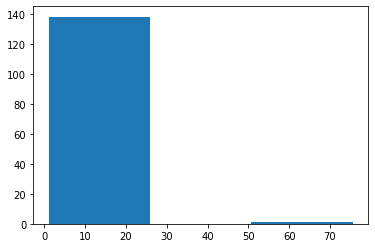

In [18]:
import matplotlib.pyplot as plt
religion = df['Jews']
plt.hist(religion, bins=3)
plt.show